In [1]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline
# reusing my codes from the repository
from codes.plot_utils import plot_pretty
plot_pretty(dpi=150, fontsize=12)

In [2]:
plot_pretty(dpi=150, fontsize=12)

### Sampling a 2d Gaussian with non-zero correlation

Now let's sample a 2-dimensional Gaussian. If the Gaussian is characterized by the mean value in two variables, $\vec{\mu}=[\mu_{x_1},\mu_{x_2}]$, rms values, $\sigma_{x_1}$, $\sigma_{x_2}$ and correlation coefficient, $\rho$. The covariance matrix is: 

$$
\mathbf{\Sigma}=\left(
  \begin{array}{cc}
   \sigma^2_{x_1} & \rho\sigma_{x_1}\sigma_{x_2} \\
     \rho\sigma_{x_1}\sigma_{x_2} & \sigma^2_{x_2}  \\
  \end{array} \right)
$$

Let's specify a Gaussian with zero means, unit variances in the two dimensions and a given correlation coefficient.

The method used to generate correlated Gaussian numbers here is described in <a href="06c_distribution_sampling.ipynb"><tt>06c_distribution_sampling.ipynb</tt></a> notebook.

In [26]:
#generate 2 sequences of correlated random Gaussian numbers

# specify rms values and correlation coefficient
s1, s2, r = 1.0, 1.0, 0.95

# define means and covariance matrix 
means = [0., 0.]
cov = [[s1**2, r*s1*s2], [r*s1*s2, s2**2]]

# compute lower triangle via Cholesky decomposition
Lcov = np.linalg.cholesky(cov)

# number of random numbers to generate
nrnd = 1000000

# generate 2 vectors of uncorrelated Gaussian numbers of zero mean and unit variance of desired length
x = np.random.normal(size=(2,nrnd))

# generate correlated numbers of zero mean
x1, x2 = np.dot(Lcov, x)

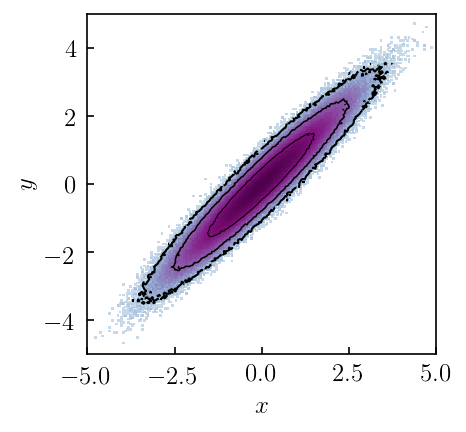

In [27]:
from codes.plot_utils import plot_2d_dist

levs = [0.6827, 0.9545, 0.9973]
plot_2d_dist(x1, x2, xlim=[-5,5], ylim =[-5,5], nxbins=200, nybins=200, 
             clevs=levs, xlabel='$x$', ylabel='$y$', figsize=(3,3))

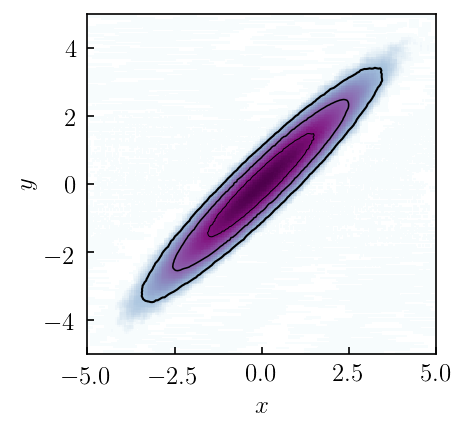

In [29]:
plot_2d_dist(x1, x2, xlim=[-5,5], ylim =[-5,5], nxbins=200, nybins=200, 
             smooth=5, clevs=levs, xlabel='$x$', ylabel='$y$', figsize=(3,3))